## Calorie Burnt Prediction with Machine Learning Regressing Models

### Importing Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

### Data Pre-Processing:

In [2]:
# Reading the CSV File
calories = pd.read_csv('calories.csv')

In [3]:
# Printing the first 5 rows of the Dataset
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
# (Rows,Columns)
calories.shape

(15000, 2)

In [5]:
# Reading the CSV File
exercise = pd.read_csv('exercise.csv')

In [6]:
# Printing the first 5 rows of the Dataset
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
# (Rows,Column)
exercise.shape

(15000, 8)

In [8]:
# Merging the Two Datasets on User ID 
df = pd.merge(calories,exercise, on='User_ID')

In [9]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [10]:
# (Rows,Column)
df.shape

(15000, 9)

In [11]:
# Information of the Datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [12]:
# Statistical Data about the Dataset
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [13]:
# Checking for Null/Values
df.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [14]:
# Checking for Duplicated Rows
df.duplicated().sum()

0

In [15]:
# Column Names of the Dataset
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

### Data Visualization:

In [16]:
sns.set()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


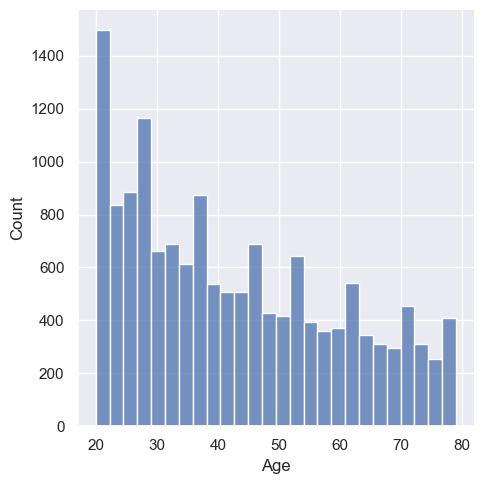

In [17]:
# Distribution Plot of the Age column
sns.displot(df['Age'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Count'>

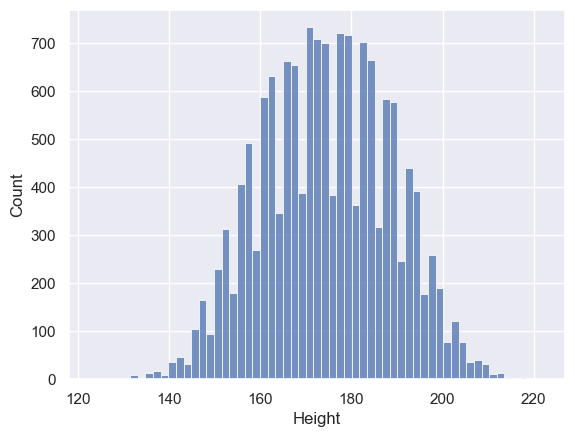

In [18]:
# Histplot of Height column
sns.histplot(df['Height'])

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


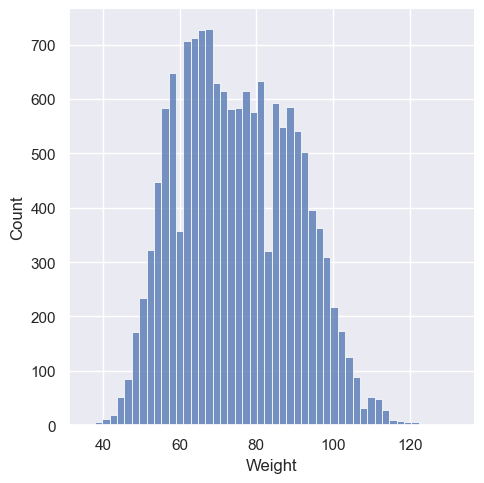

In [19]:
# Distribution plot of Weight Column
sns.displot(df['Weight'])

In [20]:
# Changing the String Values to Numeric Values
df['Gender'] = df['Gender'].map({'male':0,'female':1})

In [21]:
# Correlation of the Parameters of the Dataset
correlation = df.corr()

In [22]:
correlation

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
User_ID,1.000000,-0.001661,0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923
Calories,-0.001661,1.000000,-0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558
Gender,0.000687,-0.022357,1.000000,-0.003222,-0.710534,-0.783186,-0.003440,-0.011555,-0.007264
Age,-0.001827,0.154395,-0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175
Height,-0.013520,0.017537,-0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200
Weight,-0.011603,0.035481,-0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095
Duration,-0.002751,0.955421,-0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167
Heart_Rate,-0.000457,0.897882,-0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529
Body_Temp,0.000923,0.824558,-0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

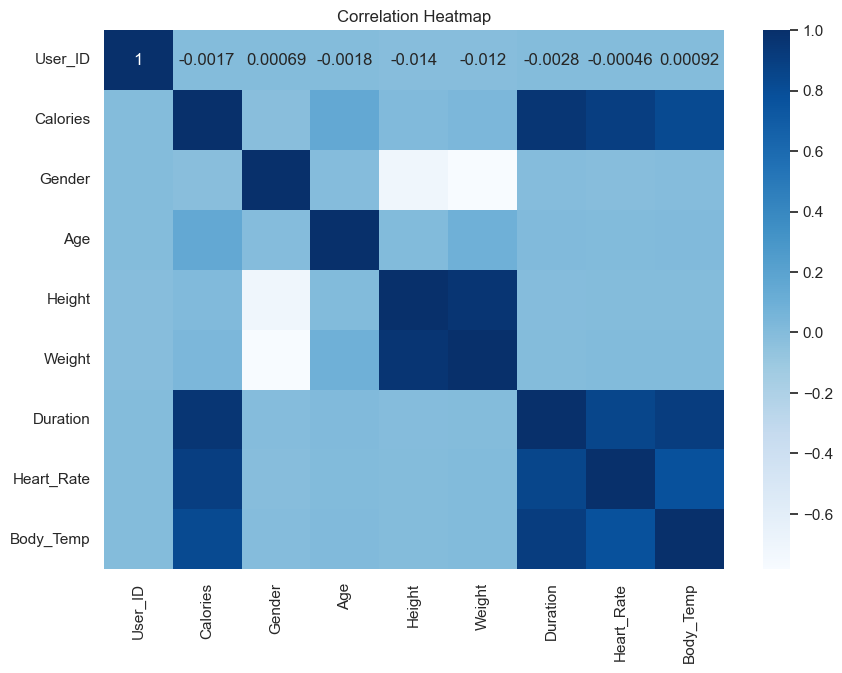

In [23]:
# Heatmap of the Correlation Matrix
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')

### Model Building:

In [24]:
# Dropping the columns and adding them to Created Variables
columns = ['User_ID', 'Calories']
x = df.drop(columns,axis=1)
y = df['Calories']

In [25]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [26]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [27]:
# Splitting the Datset into training and testing datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.09,random_state=42)

In [28]:
# Printing the Shape of the Datset
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (13650, 7) (1350, 7)


#### 1. XGB REgressor Model:

In [29]:
xgb = XGBRegressor()

In [30]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
test_data_prediction = xgb.predict(x_test)

In [32]:
test_data_prediction

array([173.94151 , 187.12149 ,  51.277374, ..., 146.81786 ,  65.25577 ,
        62.66202 ], dtype=float32)

In [33]:
rmse_xgb = mean_squared_error(y_test,test_data_prediction)

In [34]:
# Mean Squared Error of XGBRegressor
rmse_xgb

4.046262538855161

In [35]:
mae_xgb = mean_absolute_error(y_test,test_data_prediction)

In [36]:
mae_xgb

1.41646373351415

#### 2. Random Forest Regressor

In [37]:
rfr = RandomForestRegressor(n_estimators=150)

In [38]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=150)

In [39]:
rfr_prediction = rfr.predict(x_test)

In [40]:
rfr_prediction

array([170.65333333, 190.68666667,  52.91333333, ..., 148.64      ,
        64.51333333,  61.26666667])

In [41]:
rmse_rfr = mean_squared_error(y_test,rfr_prediction)

In [42]:
# Mean Squared Error of Random Forest Regressor
rmse_rfr

6.3782695967078205

In [43]:
mae_rfr = mean_absolute_error(y_test,rfr_prediction)

In [44]:
mae_rfr

1.5837185185185185

#### 3. AdaBoost Regressor

In [45]:
abr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=200, random_state=42)

In [46]:
abr.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=200, random_state=42)

In [47]:
abr_prediction = abr.predict(x_test)

In [48]:
abr_prediction

array([180.64639357, 195.27859238,  50.40271493, ..., 161.01643192,
        56.91959799,  61.29767442])

In [49]:
rmse_abr = mean_squared_error(y_test,abr_prediction)

In [50]:
# Mean Squared Error od AdaBoost Regressor
rmse_abr

66.7479348405072

In [51]:
mae_abr = mean_absolute_error(y_test,abr_prediction)

In [52]:
mae_abr

6.568413663699871

#### 4. CatBoost Regressor

In [53]:
cbr = CatBoostRegressor()

In [54]:
cbr.fit(x_train,y_train)

Learning rate set to 0.061877
0:	learn: 58.8983952	total: 58.2ms	remaining: 58.1s
1:	learn: 55.6562075	total: 59.3ms	remaining: 29.6s
2:	learn: 52.5318277	total: 60.9ms	remaining: 20.2s
3:	learn: 49.6325112	total: 62.7ms	remaining: 15.6s
4:	learn: 46.9396708	total: 63.8ms	remaining: 12.7s
5:	learn: 44.3354759	total: 65ms	remaining: 10.8s
6:	learn: 41.9444698	total: 66.1ms	remaining: 9.38s
7:	learn: 39.7698279	total: 67.4ms	remaining: 8.35s
8:	learn: 37.6516915	total: 68.5ms	remaining: 7.54s
9:	learn: 35.6062944	total: 69.7ms	remaining: 6.9s
10:	learn: 33.7701149	total: 70.8ms	remaining: 6.36s
11:	learn: 31.9545460	total: 71.8ms	remaining: 5.91s
12:	learn: 30.2667792	total: 73ms	remaining: 5.54s
13:	learn: 28.7292184	total: 74.3ms	remaining: 5.23s
14:	learn: 27.2327112	total: 75.4ms	remaining: 4.95s
15:	learn: 25.8081233	total: 76.6ms	remaining: 4.71s
16:	learn: 24.4577019	total: 77.8ms	remaining: 4.5s
17:	learn: 23.2392606	total: 78.9ms	remaining: 4.3s
18:	learn: 22.0985609	total: 80.3

In [55]:
cbr_prediction = cbr.predict(x_test)

In [56]:
rmse_cbr =  mean_squared_error(y_test,cbr_prediction)

In [57]:
# Mean Squared Error of CatBoost Regressor
rmse_cbr

0.36412838644193024

In [58]:
mae_cbr = mean_absolute_error(y_test,cbr_prediction)

In [59]:
mae_cbr

0.45089255208657175

#### CatBoost Regressor is the Best Regressor Model on this Dataset. CatBoost has lowest Mean Squared Error and Mean Absolute Error Regressor compared to other regressing models. "0.36412838644193024" and "0.45089255208657175"